# **Data Dictonary**

1. `Symboling` : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. associated with a particular car model.
2. `normalized-losses` : Normalized losses refer to the average loss payment per insured vehicle
3. `make` : Name of car company
4. `fuel-type` : Car fuel type
5. `aspiration` : Aspiration used in the car
6. `num-of-doors` : Number of doors in a car
7. `body-style` : Shape and layout of the car's exterior of the car
8. `drive-wheels` : Type of drive wheel
9. `engine-location` : Location of the car engine
10. `wheel-base` : Weelbase of the car
11. `length` : Length of the car
12. `width` : Width of the car
13. `height` : Height of the car
14. `curb-weight` : The weight of a car without occupants or baggage
15. `engine-type` : Type of engine
16. `num-of-cylinders` : Cylinders placed in the car
17. `engine-size` : Size of the car engine
18. `fuel-system` : Fuel system of the car
19. `bore` : Boreratio of the car
20. `stroke` : Stroke length of the engine the distance that the piston travels inside the engine cylinder.
21. `compression-ratio` : Compression ratio of car
22. `horsepower` : Horsepower of the car
23. `peak-rpm` : The peak revolutions per minute of an engine of the car
24. `city-mpg` : Car's mileage in the city
25. `highway-mpg` : Car's mileage on highway
26. `price` : Price of the car

# **Tasks**

The following are the broad tasks to be performed on the project:

- Load the data into your code
- Perform EDA and a detailed analysis on the data.
- Prepare the data preprocessing pipelies.
- Apply the required preprocessing techniques on the data.
- Keep 20% of the data aside as test data.
- Apply different machine learning techniques.
- Report the following metrics using different regression models on the test data:
     - MSE
     - R2-score

- Prepare a brief report documenting the key steps involved along with the reasoning behind different decisions that you made in these steps.

# **Notes**

Write textual comments in your code wherever appropriate.

Note: As a data scientist, you might need to make several decisions while exploring the data feel free to do that and mention the same in the report.
Be as innovative and creative as possible. Visualize data wherever required.

#**Task 1 - Load the data into your code and import the necessary libraries**

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
car_df = pd.read_csv('cars_price.csv')

#**Task 2 - Analyse the data using following functions:**

- head(),
- tail(),
- info(),
- describe() and
- isnull().sum(). Report your findings.

In [3]:
car_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450
5,2.0,?,audi,gas,std,two,sedan,NaN,front,99.8,...,136.0,mpfi,3.19,3.4,8.5,110,5500,19.0,NaN,15250
6,1.0,158,audi,gas,NaN,four,NaN,fwd,front,105.8,...,136.0,mpfi,3.19,3.4,8.5,NaN,5500,NaN,25.0,17710
7,1.0,?,audi,gas,std,four,wagon,fwd,front,NaN,...,136.0,NaN,3.19,3.4,8.5,110,NaN,19.0,25.0,18920
8,1.0,158,NaN,gas,turbo,four,sedan,NaN,front,105.8,...,131.0,mpfi,3.13,3.4,8.3,140,5500,17.0,20.0,23875
9,NaN,?,NaN,gas,turbo,two,hatchback,NaN,front,99.5,...,131.0,mpfi,3.13,3.4,7.0,160,5500,16.0,22.0,?


In [4]:
car_df.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30320,2.0,NaN,saab,gas,std,four,sedan,fwd,front,NaN,...,121.0,mpfi,3.54,NaN,9.3,110,5250,NaN,28.0,NaN
30321,-1.0,90,toyota,gas,std,four,sedan,rwd,front,104.5,...,171.0,mpfi,3.27,3.35,NaN,156,5200,20.0,24.0,15690
30322,3.0,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,...,110.0,spdi,3.17,3.46,7.5,116,5500,23.0,30.0,9959
30323,1.0,128,nissan,gas,std,NaN,sedan,fwd,front,94.5,...,97.0,2bbl,NaN,NaN,9.4,69,NaN,31.0,37.0,7299
30324,0.0,102,subaru,gas,std,NaN,sedan,4wd,front,97.0,...,108.0,2bbl,3.62,2.64,9.0,82,4800,24.0,NaN,9233
30325,3.0,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80.0,mpfi,NaN,NaN,9.4,135,NaN,NaN,NaN,15645
30326,NaN,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98.0,mpfi,3.24,NaN,9.4,112,6600,26.0,29.0,9538
30327,1.0,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91.0,2bbl,3.03,NaN,9.0,68,5000,31.0,38.0,6695
30328,3.0,186,porsche,gas,std,NaN,hatchback,rwd,front,94.5,...,151.0,mpfi,3.94,NaN,9.5,143,5500,19.0,27.0,22018
30329,NaN,65,toyota,gas,NaN,four,hatchback,fwd,front,102.4,...,122.0,mpfi,NaN,3.54,8.7,NaN,4200,27.0,32.0,9988


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

In [6]:
car_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,27286.000000,27264.000000,27258.000000,27387.000000,27281.000000,27302.000000,27271.000000,27327.000000,27229.000000,27303.000000
mean,0.839075,98.807875,174.158302,65.918114,53.732059,2560.265988,127.322834,10.128243,25.158507,30.709885
std,1.239600,6.037800,12.366150,2.143679,2.438541,522.483478,41.863332,3.943566,6.517298,6.862626
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
car_df.shape

(30330, 26)

In [8]:
car_df.isnull().sum()

,0
symboling,3044
normalized-losses,3036
make,3102
fuel-type,3021
aspiration,2975
num-of-doors,3009
body-style,3004
drive-wheels,3115
engine-location,2978
wheel-base,3066



# **Task 3 - Data Cleaning**

- Check and remove the duplicate rows
- Check the unique values of all categorical columns
- Check the data types of all columns and ensure they are correct (convert where required)
- Impute the missing values

In [9]:
# We need to remove duplicated
car_df.duplicated().sum()

4456

In [10]:
car_df.drop_duplicates(inplace= True)

In [11]:
car_df.shape

(25874, 26)

In [12]:
# To find all the categorical columns
categorical_cols = car_df.select_dtypes(exclude= np.number).columns
categorical_cols

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [13]:
for columns in categorical_cols:
    unique_vals = car_df[columns].unique()
    print(f'\nUnique values for {columns}: {unique_vals}\n')


Unique values for normalized-losses: [nan '?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145'
 '137' '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93'
 '161' '153' '125' '128' '103' '122' '108' '194' '231' '119' '154' '74'
 '186' '83' '102' '89' '87' '77' '91' '168' '134' '65' '197' '90' '94'
 '256' '95' '142']


Unique values for make: ['alfa-romero' 'audi' nan 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu'
 'jaguar' 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


Unique values for fuel-type: ['gas' nan 'diesel']


Unique values for aspiration: ['std' nan 'turbo']


Unique values for num-of-doors: ['two' 'four' nan '?']


Unique values for body-style: ['convertible' 'hatchback' 'sedan' nan 'wagon' 'hardtop']


Unique values for drive-wheels: ['rwd' 'fwd' '4wd' nan]


Unique values for engine-location: ['front' nan 'rear']


Unique values for engine-type: ['dohc' 

In [14]:
car_df.nunique()

,0
symboling,6
normalized-losses,52
make,22
fuel-type,2
aspiration,2
num-of-doors,3
body-style,5
drive-wheels,3
engine-location,2
wheel-base,53


In [15]:
car_df.replace(['?', ''], np.nan, inplace= True)

In [16]:
car_df.dtypes

,0
symboling,float64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [17]:
# Converting object datatype numerical columns to numerical columns
columns_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for columns in columns_to_convert:
    car_df[columns] = car_df[columns].astype(float)

In [18]:
# Now we can check the data types
car_df.dtypes

,0
symboling,float64
normalized-losses,float64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [19]:
numerical_cols = car_df.select_dtypes(include= ['float64', 'int64']).columns
# numerical_cols

categorical_cols = car_df.select_dtypes(include= ['object']).columns
categorical_cols, numerical_cols

(Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
        'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
        'fuel-system'],
       dtype='object'),
 Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
        'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price'],
       dtype='object'))

In [20]:
# Imputing missing values
for columns in numerical_cols:
  car_df[columns].fillna(car_df[columns].mean(), inplace= True)

for columns in categorical_cols:
  car_df[columns].fillna(car_df[columns].mode()[0], inplace= True)

In [21]:
car_df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


1. **Numerical Columns:** The missing values are imputed with mean
2. **Categorical Columns:** The missing values are imputed with mode

In [22]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25874 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          25874 non-null  float64
 1   normalized-losses  25874 non-null  float64
 2   make               25874 non-null  object 
 3   fuel-type          25874 non-null  object 
 4   aspiration         25874 non-null  object 
 5   num-of-doors       25874 non-null  object 
 6   body-style         25874 non-null  object 
 7   drive-wheels       25874 non-null  object 
 8   engine-location    25874 non-null  object 
 9   wheel-base         25874 non-null  float64
 10  length             25874 non-null  float64
 11  width              25874 non-null  float64
 12  height             25874 non-null  float64
 13  curb-weight        25874 non-null  float64
 14  engine-type        25874 non-null  object 
 15  num-of-cylinders   25874 non-null  object 
 16  engine-size        25874 no

# **Task 4 - Exploratory Data Analysis (EDA)**

- Visualize Target feature distribution
- Check the skewness of the target variable
- Visualize total No. of cars sold by different companys
- Visualizing Car Company with Price
- Correlation of Numerical features with Price(Target variable)

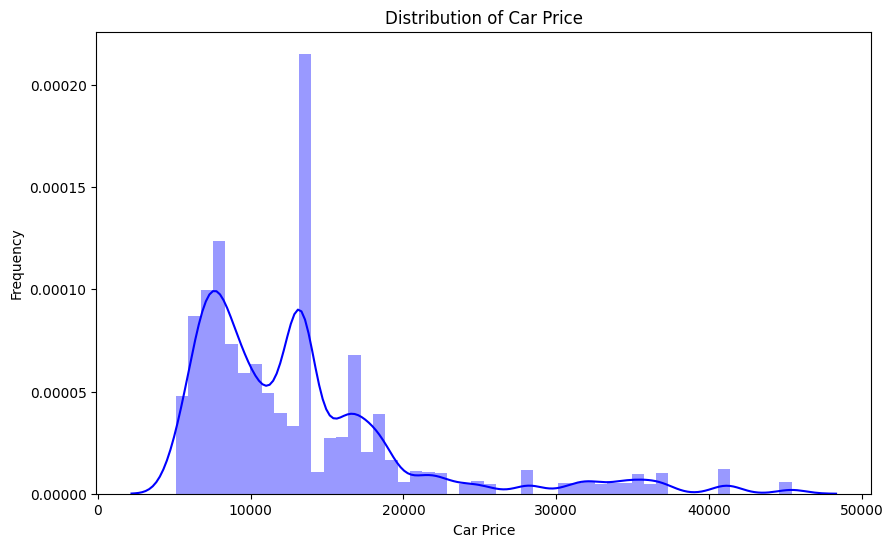

In [23]:
# Plotting the Distribution plot of the target variable
plt.figure(figsize= (10, 6))
plt.title('Distribution of Car Price')
sns.distplot(car_df['price'], kde= True, color= 'blue')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

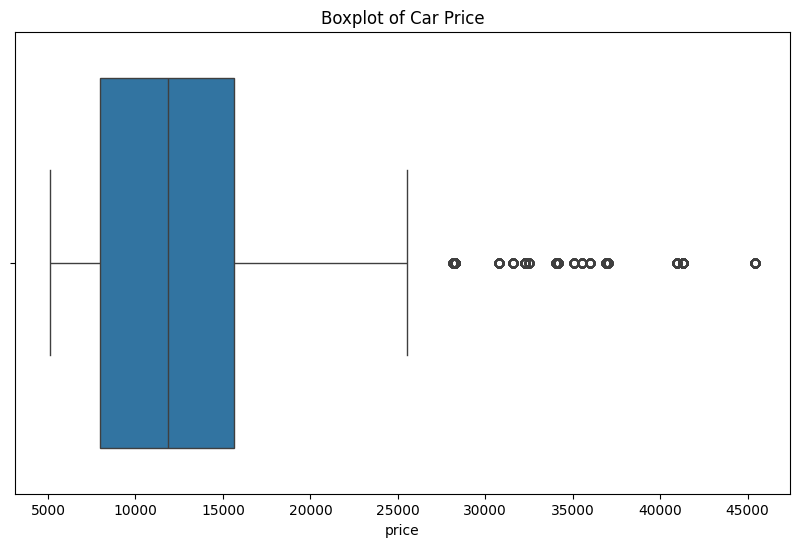

In [24]:
# Visualizing the target variable using the Boxplot to check for any outliers and skewness
plt.figure(figsize= (10, 6))
plt.title('Boxplot of Car Price')
sns.boxplot(x= 'price', data= car_df)
plt.show()

In [25]:
# First, we need to check the value_counts for the 'make' column
car_df['make'].value_counts()

,count
make,
toyota,6537
nissan,1956
mazda,1904
mitsubishi,1521
honda,1396
subaru,1377
volkswagen,1356
peugot,1244
volvo,1163


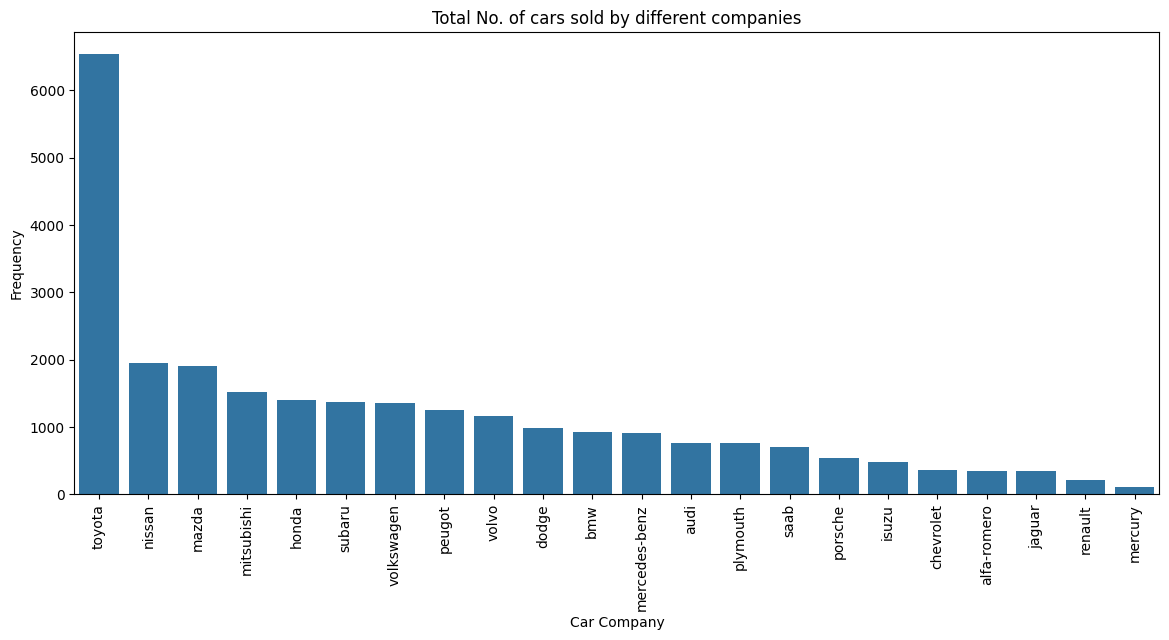

In [26]:
# Visualize total No. of cars sold by different companies
plt.figure(figsize= (14, 6))
category_order = car_df['make'].value_counts()
sns.countplot(data= car_df, x= 'make', order= category_order.index)
plt.title('Total No. of cars sold by different companies')
plt.xlabel('Car Company')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

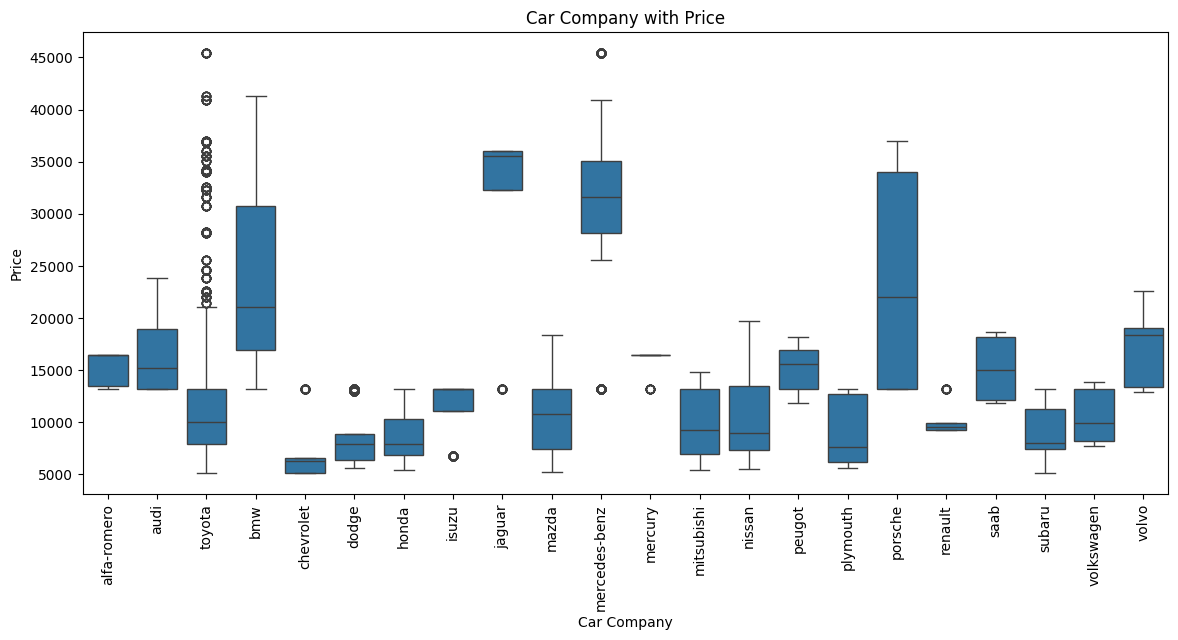

In [27]:
# Visualizing Car Company with Price
plt.figure(figsize= (14, 6))
sns.boxplot(x= 'make', y= 'price', data= car_df)
plt.title('Car Company with Price')
plt.xlabel('Car Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [28]:
car_df.groupby("make")['price'].mean().sort_values(ascending= False)

,price
make,
jaguar,32079.179277
mercedes-benz,30901.448863
porsche,25478.817391
bmw,25183.393571
volvo,17649.224732
audi,16654.818860
mercury,16063.322853
alfa-romero,15308.606336
peugot,15178.049791


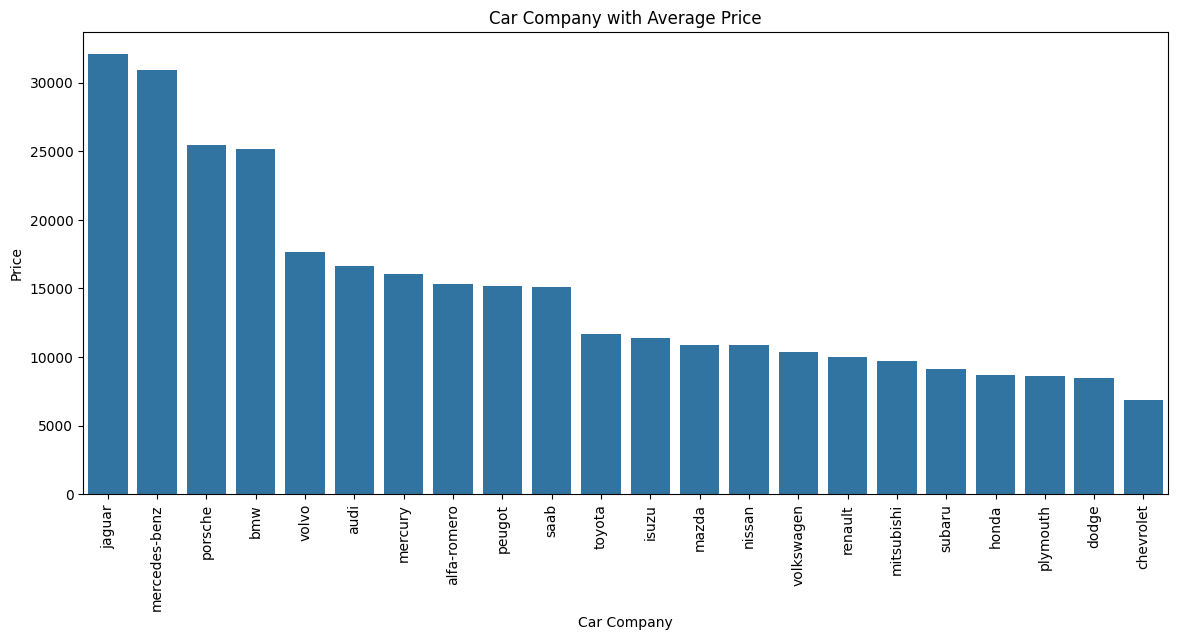

In [29]:
plt.figure(figsize= (14, 6))
average_car = car_df.groupby('make')['price'].mean().sort_values(ascending= False)
sns.barplot(x= average_car.index, y= average_car.values)
plt.title('Car Company with Average Price')
plt.xlabel('Car Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [30]:
# We compaired the 'make' column with the target variable, Now
# We need to visualize the categorical features of the dataset with the target variable to check for data distribution
categorical_cols = car_df.select_dtypes(include= ['object']).columns
categorical_cols

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [31]:
def Cat_visualization(categorical_cols):
  plt.figure(figsize= (14, 6))
  plt.subplot(1,3,1)
  sns.countplot(x= categorical_cols, data= car_df, palette= 'Paired', order= car_df[categorical_cols].value_counts().index)
  plt.title(f"{categorical_cols} Vs Price", fontweight= 'black', fontsize= 15)
  plt.xticks(rotation=90)

  plt.subplot(1,3,2)
  sns.boxplot(x= categorical_cols, y= 'price', data= car_df, order= car_df[categorical_cols].value_counts().index)
  plt.title(f"{categorical_cols} Vs Price", fontweight= 'black', fontsize= 15)
  plt.xticks(rotation=90)


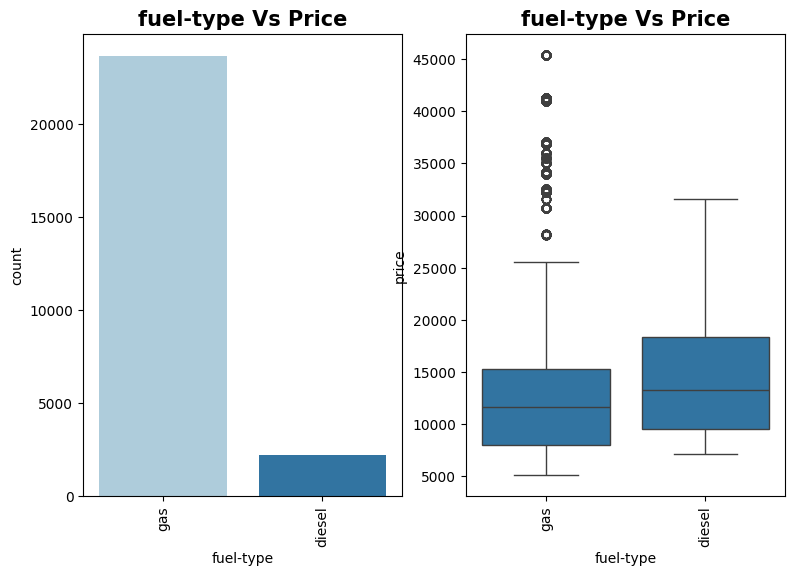

In [32]:
Cat_visualization('fuel-type')

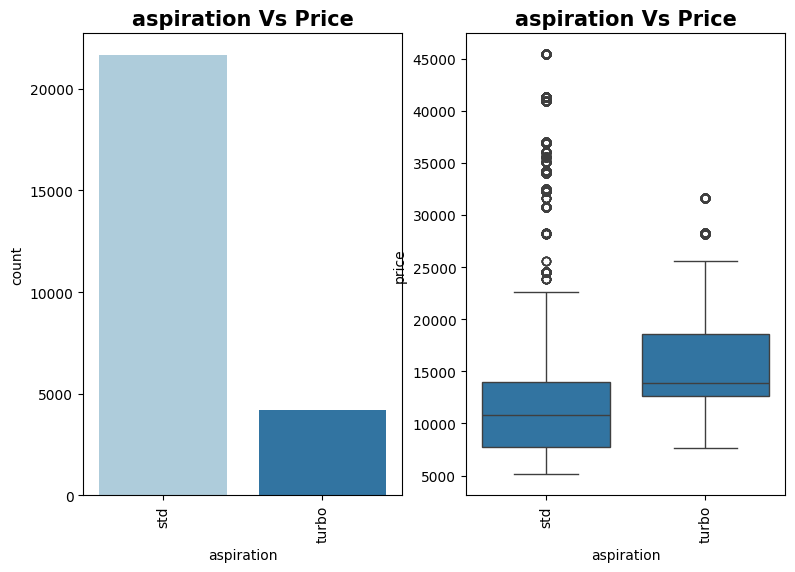

In [33]:
Cat_visualization('aspiration')

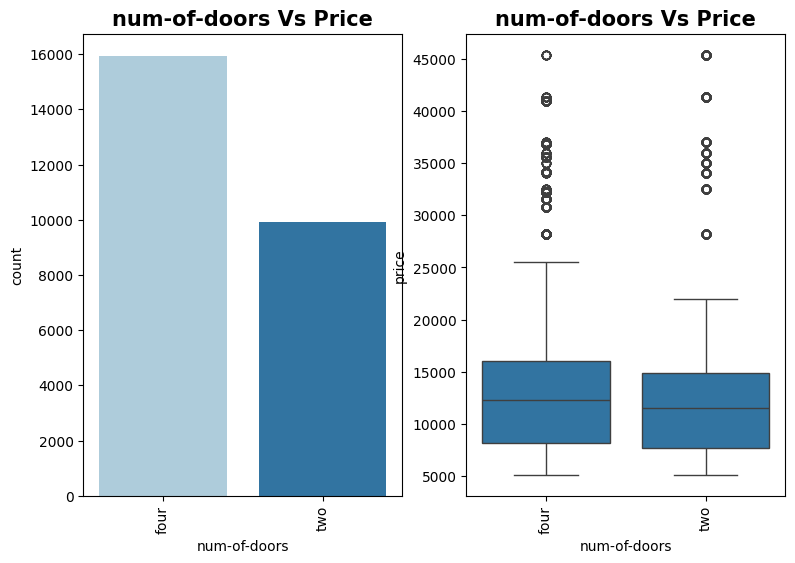

In [34]:
Cat_visualization('num-of-doors')

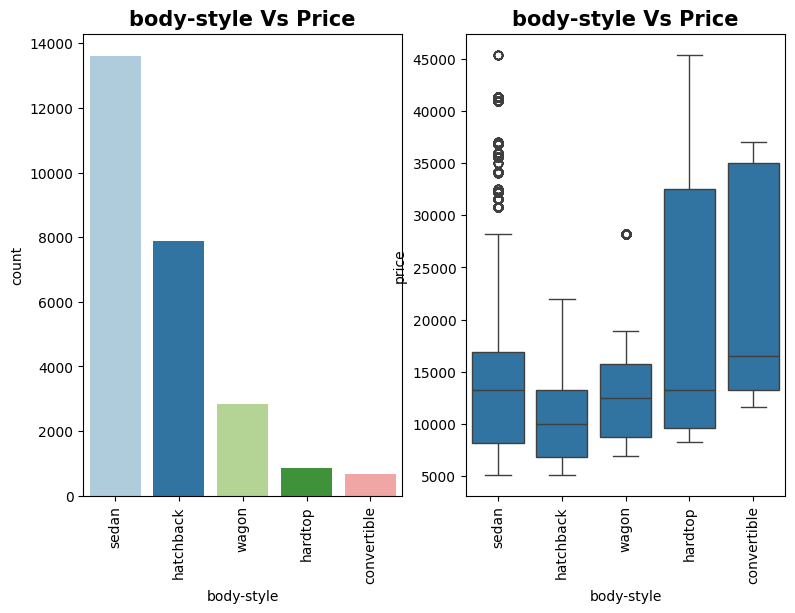

In [35]:
Cat_visualization('body-style')

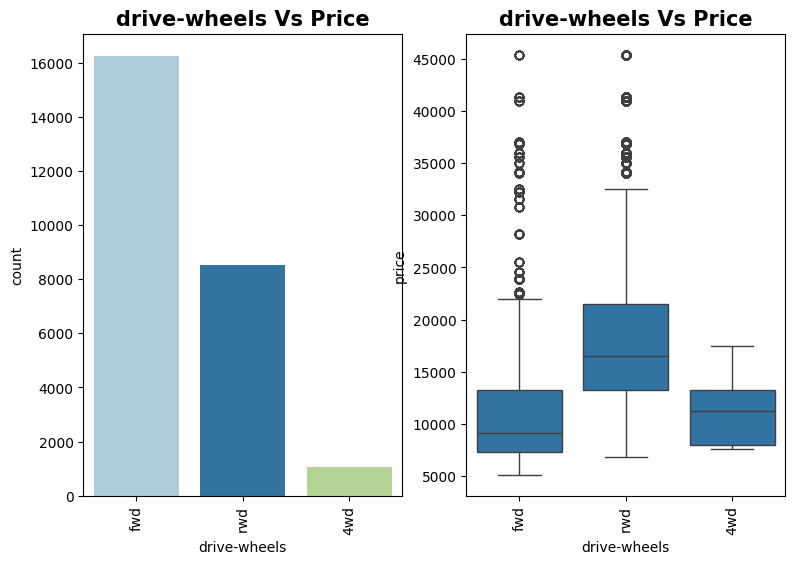

In [36]:
Cat_visualization('drive-wheels')

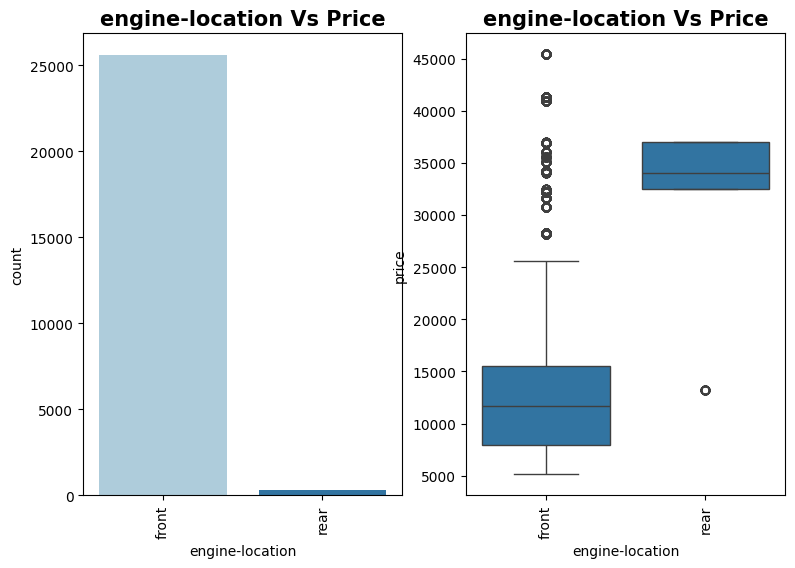

In [37]:
Cat_visualization('engine-location')

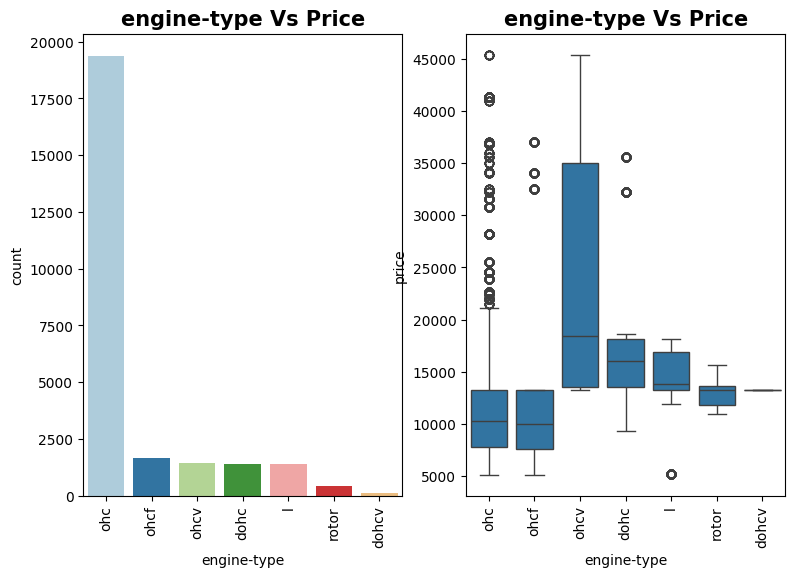

In [38]:
Cat_visualization('engine-type')

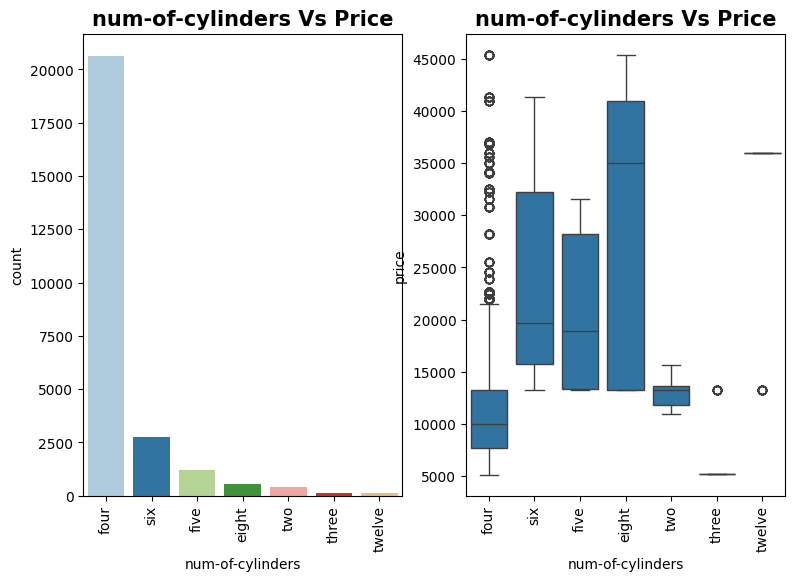

In [39]:
Cat_visualization('num-of-cylinders')

In [40]:
car_df[car_df['num-of-cylinders'] == 'three']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2.0,121.000000,chevrolet,gas,std,two,hatchback,fwd,front,88.40000,...,61.000000,2bbl,2.910000,3.030000,9.500000,48.000000,5100.000000,47.000000,53.0,5151.0
691,2.0,121.000000,chevrolet,gas,std,two,sedan,fwd,front,98.81229,...,61.000000,2bbl,2.910000,3.030000,9.500000,48.000000,5122.364091,47.000000,53.0,5151.0
837,2.0,121.000000,chevrolet,gas,std,two,hatchback,fwd,front,88.40000,...,61.000000,2bbl,2.910000,3.030000,9.500000,48.000000,5100.000000,47.000000,53.0,5151.0
906,2.0,121.000000,chevrolet,gas,std,two,hatchback,fwd,front,88.40000,...,61.000000,2bbl,2.910000,3.257518,9.500000,48.000000,5100.000000,47.000000,53.0,5151.0
914,2.0,121.000000,chevrolet,gas,std,two,sedan,fwd,front,88.40000,...,127.322394,2bbl,2.910000,3.030000,10.121975,48.000000,5100.000000,47.000000,53.0,5151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,2.0,121.000000,chevrolet,gas,std,two,hatchback,fwd,front,88.40000,...,61.000000,2bbl,3.330293,3.030000,9.500000,48.000000,5100.000000,47.000000,53.0,5151.0
30034,2.0,121.000000,chevrolet,gas,std,four,sedan,fwd,front,88.40000,...,61.000000,2bbl,2.910000,3.030000,9.500000,48.000000,5100.000000,25.148543,53.0,5151.0
30168,2.0,122.399606,chevrolet,gas,std,four,hatchback,fwd,front,88.40000,...,61.000000,2bbl,2.910000,3.030000,9.500000,48.000000,5122.364091,47.000000,53.0,5151.0
30185,2.0,121.000000,chevrolet,gas,std,two,hatchback,fwd,front,88.40000,...,61.000000,2bbl,2.910000,3.030000,9.500000,48.000000,5100.000000,47.000000,53.0,5151.0


In [41]:
car_df[car_df['num-of-cylinders'] == 'twelve']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
277,0.0,122.399606,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326.000000,mpfi,3.540000,3.257518,11.500000,262.0,5000.000000,13.0,17.0000,36000.000000
624,0.0,122.399606,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326.000000,mpfi,3.540000,2.760000,11.500000,262.0,5000.000000,13.0,30.7002,13236.826905
1074,0.0,122.399606,toyota,gas,std,two,sedan,fwd,front,102.0,...,127.322394,mpfi,3.540000,2.760000,11.500000,262.0,5000.000000,13.0,17.0000,36000.000000
1093,0.0,122.399606,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326.000000,mpfi,3.540000,2.760000,10.121975,262.0,5000.000000,13.0,17.0000,36000.000000
2101,0.0,122.399606,jaguar,gas,std,two,sedan,rwd,front,102.0,...,127.322394,mpfi,3.540000,2.760000,11.500000,262.0,5000.000000,13.0,17.0000,36000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29256,0.0,122.399606,jaguar,gas,std,four,sedan,rwd,front,102.0,...,326.000000,mpfi,3.540000,2.760000,11.500000,262.0,5000.000000,13.0,17.0000,36000.000000
29428,0.0,122.399606,toyota,gas,std,four,sedan,rwd,front,102.0,...,326.000000,mpfi,3.540000,2.760000,11.500000,262.0,5000.000000,13.0,17.0000,13236.826905
29586,0.0,122.399606,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326.000000,mpfi,3.330293,2.760000,11.500000,262.0,5122.364091,13.0,17.0000,36000.000000
29590,0.0,122.399606,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326.000000,mpfi,3.540000,2.760000,11.500000,262.0,5000.000000,13.0,17.0000,36000.000000


In [42]:
car_df[car_df['num-of-cylinders'] == 'four']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.000000,122.399606,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,...,127.322394,mpfi,3.470000,2.680000,9.0,111.000000,5122.364091,21.0,27.0000,13495.0
1,3.000000,122.399606,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,...,130.000000,mpfi,3.470000,2.680000,9.0,111.000000,5122.364091,21.0,27.0000,16500.0
3,2.000000,164.000000,audi,gas,std,four,sedan,fwd,front,99.80000,...,109.000000,mpfi,3.190000,3.257518,10.0,102.000000,5500.000000,24.0,30.0000,13950.0
5,2.000000,122.399606,audi,gas,std,two,sedan,fwd,front,99.80000,...,136.000000,mpfi,3.190000,3.400000,8.5,110.000000,5500.000000,19.0,30.7002,15250.0
10,2.000000,192.000000,toyota,gas,std,two,sedan,rwd,front,98.81229,...,108.000000,mpfi,3.500000,2.800000,8.8,101.000000,5800.000000,23.0,29.0000,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30323,1.000000,128.000000,nissan,gas,std,four,sedan,fwd,front,94.50000,...,97.000000,2bbl,3.330293,3.257518,9.4,69.000000,5122.364091,31.0,37.0000,7299.0
30324,0.000000,102.000000,subaru,gas,std,four,sedan,4wd,front,97.00000,...,108.000000,2bbl,3.620000,2.640000,9.0,82.000000,4800.000000,24.0,30.7002,9233.0
30326,0.842516,168.000000,toyota,gas,std,two,hatchback,rwd,front,94.50000,...,98.000000,mpfi,3.240000,3.257518,9.4,112.000000,6600.000000,26.0,29.0000,9538.0
30328,3.000000,186.000000,porsche,gas,std,four,hatchback,rwd,front,94.50000,...,151.000000,mpfi,3.940000,3.257518,9.5,143.000000,5500.000000,19.0,27.0000,22018.0


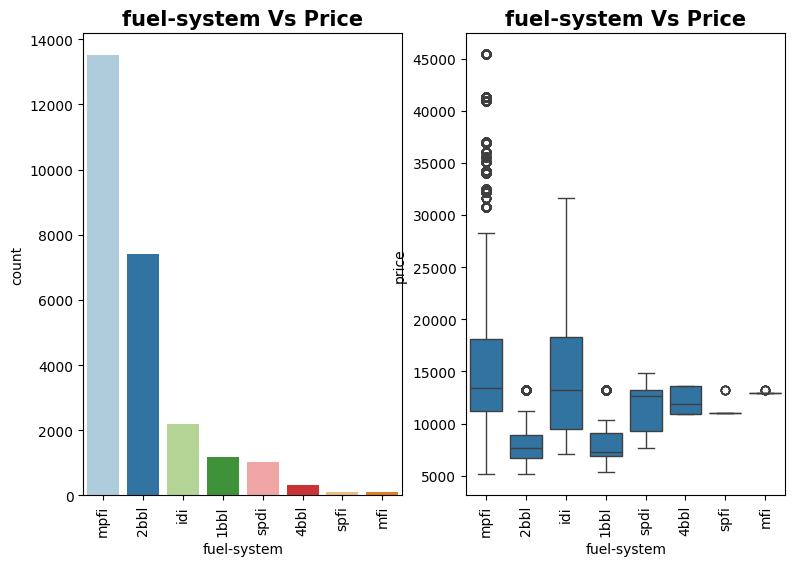

In [43]:
Cat_visualization('fuel-system')

In [44]:
car_df[car_df['fuel-system'] == 'mfi']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
29,3.000000,145.000000,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156.0,mfi,3.6,3.900000,7.0,145.000000,5000.000000,25.148543,24.0,12964.0
385,3.000000,145.000000,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156.0,mfi,3.6,3.900000,7.0,145.000000,5000.000000,25.148543,24.0,12964.0
562,0.842516,145.000000,dodge,gas,turbo,two,sedan,fwd,front,95.9,...,156.0,mfi,3.6,3.900000,7.0,145.000000,5000.000000,19.000000,24.0,12964.0
1011,0.842516,122.399606,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156.0,mfi,3.6,3.900000,7.0,145.000000,5000.000000,19.000000,24.0,12964.0
1096,3.000000,145.000000,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156.0,mfi,3.6,3.900000,7.0,145.000000,5000.000000,19.000000,24.0,12964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28594,3.000000,145.000000,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156.0,mfi,3.6,3.900000,7.0,145.000000,5122.364091,19.000000,24.0,12964.0
28920,3.000000,145.000000,dodge,gas,turbo,four,hatchback,fwd,front,95.9,...,156.0,mfi,3.6,3.257518,7.0,104.724854,5000.000000,19.000000,24.0,12964.0
29171,3.000000,145.000000,dodge,gas,std,two,hatchback,fwd,front,95.9,...,156.0,mfi,3.6,3.900000,7.0,104.724854,5000.000000,19.000000,24.0,12964.0
29754,3.000000,145.000000,dodge,gas,turbo,four,hatchback,fwd,front,95.9,...,156.0,mfi,3.6,3.900000,7.0,145.000000,5000.000000,19.000000,24.0,12964.0


In [45]:
car_df[car_df['fuel-system'] == 'spfi']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
46,2.0,122.399606,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119.000000,spfi,3.330293,3.23,9.200000,90.000000,5000.0,24.000000,29.0000,13236.826905
676,2.0,122.399606,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119.000000,spfi,3.430000,3.23,9.200000,90.000000,5000.0,24.000000,30.7002,11048.000000
730,2.0,122.399606,isuzu,gas,std,two,sedan,rwd,front,96.0,...,119.000000,spfi,3.430000,3.23,9.200000,90.000000,5000.0,25.148543,29.0000,11048.000000
947,2.0,122.399606,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119.000000,spfi,3.430000,3.23,10.121975,90.000000,5000.0,24.000000,29.0000,11048.000000
957,2.0,122.399606,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,127.322394,spfi,3.330293,3.23,9.200000,90.000000,5000.0,24.000000,29.0000,11048.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28935,2.0,122.399606,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119.000000,spfi,3.430000,3.23,9.200000,90.000000,5000.0,24.000000,29.0000,11048.000000
28983,2.0,122.399606,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119.000000,spfi,3.430000,3.23,9.200000,90.000000,5000.0,24.000000,29.0000,11048.000000
29687,2.0,122.399606,isuzu,gas,std,two,sedan,rwd,front,96.0,...,119.000000,spfi,3.430000,3.23,9.200000,90.000000,5000.0,25.148543,29.0000,11048.000000
29944,2.0,122.399606,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,127.322394,spfi,3.430000,3.23,9.200000,104.724854,5000.0,24.000000,29.0000,11048.000000


In [46]:
car_df[car_df['fuel-system'] == 'mpfi']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.000000,122.399606,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,...,127.322394,mpfi,3.470000,2.680000,9.0,111.000000,5122.364091,21.000000,27.0000,13495.000000
1,3.000000,122.399606,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,...,130.000000,mpfi,3.470000,2.680000,9.0,111.000000,5122.364091,21.000000,27.0000,16500.000000
2,1.000000,122.399606,alfa-romero,gas,std,two,hatchback,rwd,front,94.50000,...,152.000000,mpfi,3.330293,3.470000,9.0,154.000000,5122.364091,19.000000,26.0000,16500.000000
3,2.000000,164.000000,audi,gas,std,four,sedan,fwd,front,99.80000,...,109.000000,mpfi,3.190000,3.257518,10.0,102.000000,5500.000000,24.000000,30.0000,13950.000000
4,2.000000,164.000000,audi,gas,std,four,sedan,4wd,front,99.40000,...,136.000000,mpfi,3.330293,3.400000,8.0,115.000000,5500.000000,18.000000,22.0000,17450.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30320,2.000000,122.399606,saab,gas,std,four,sedan,fwd,front,98.81229,...,121.000000,mpfi,3.540000,3.257518,9.3,110.000000,5250.000000,25.148543,28.0000,13236.826905
30325,3.000000,150.000000,mazda,gas,std,two,hatchback,rwd,front,95.30000,...,80.000000,mpfi,3.330293,3.257518,9.4,135.000000,5122.364091,25.148543,30.7002,15645.000000
30326,0.842516,168.000000,toyota,gas,std,two,hatchback,rwd,front,94.50000,...,98.000000,mpfi,3.240000,3.257518,9.4,112.000000,6600.000000,26.000000,29.0000,9538.000000
30328,3.000000,186.000000,porsche,gas,std,four,hatchback,rwd,front,94.50000,...,151.000000,mpfi,3.940000,3.257518,9.5,143.000000,5500.000000,19.000000,27.0000,22018.000000


# **Insights:**
1. Most number of cars are having 4 number of cylinders
2. Cars with 8 number of cylinders are most expensive
3. No specific data for Cars with 3 or 12 number of cylinders
4. Most cars whose fuel system is "mpfi" are more expensive


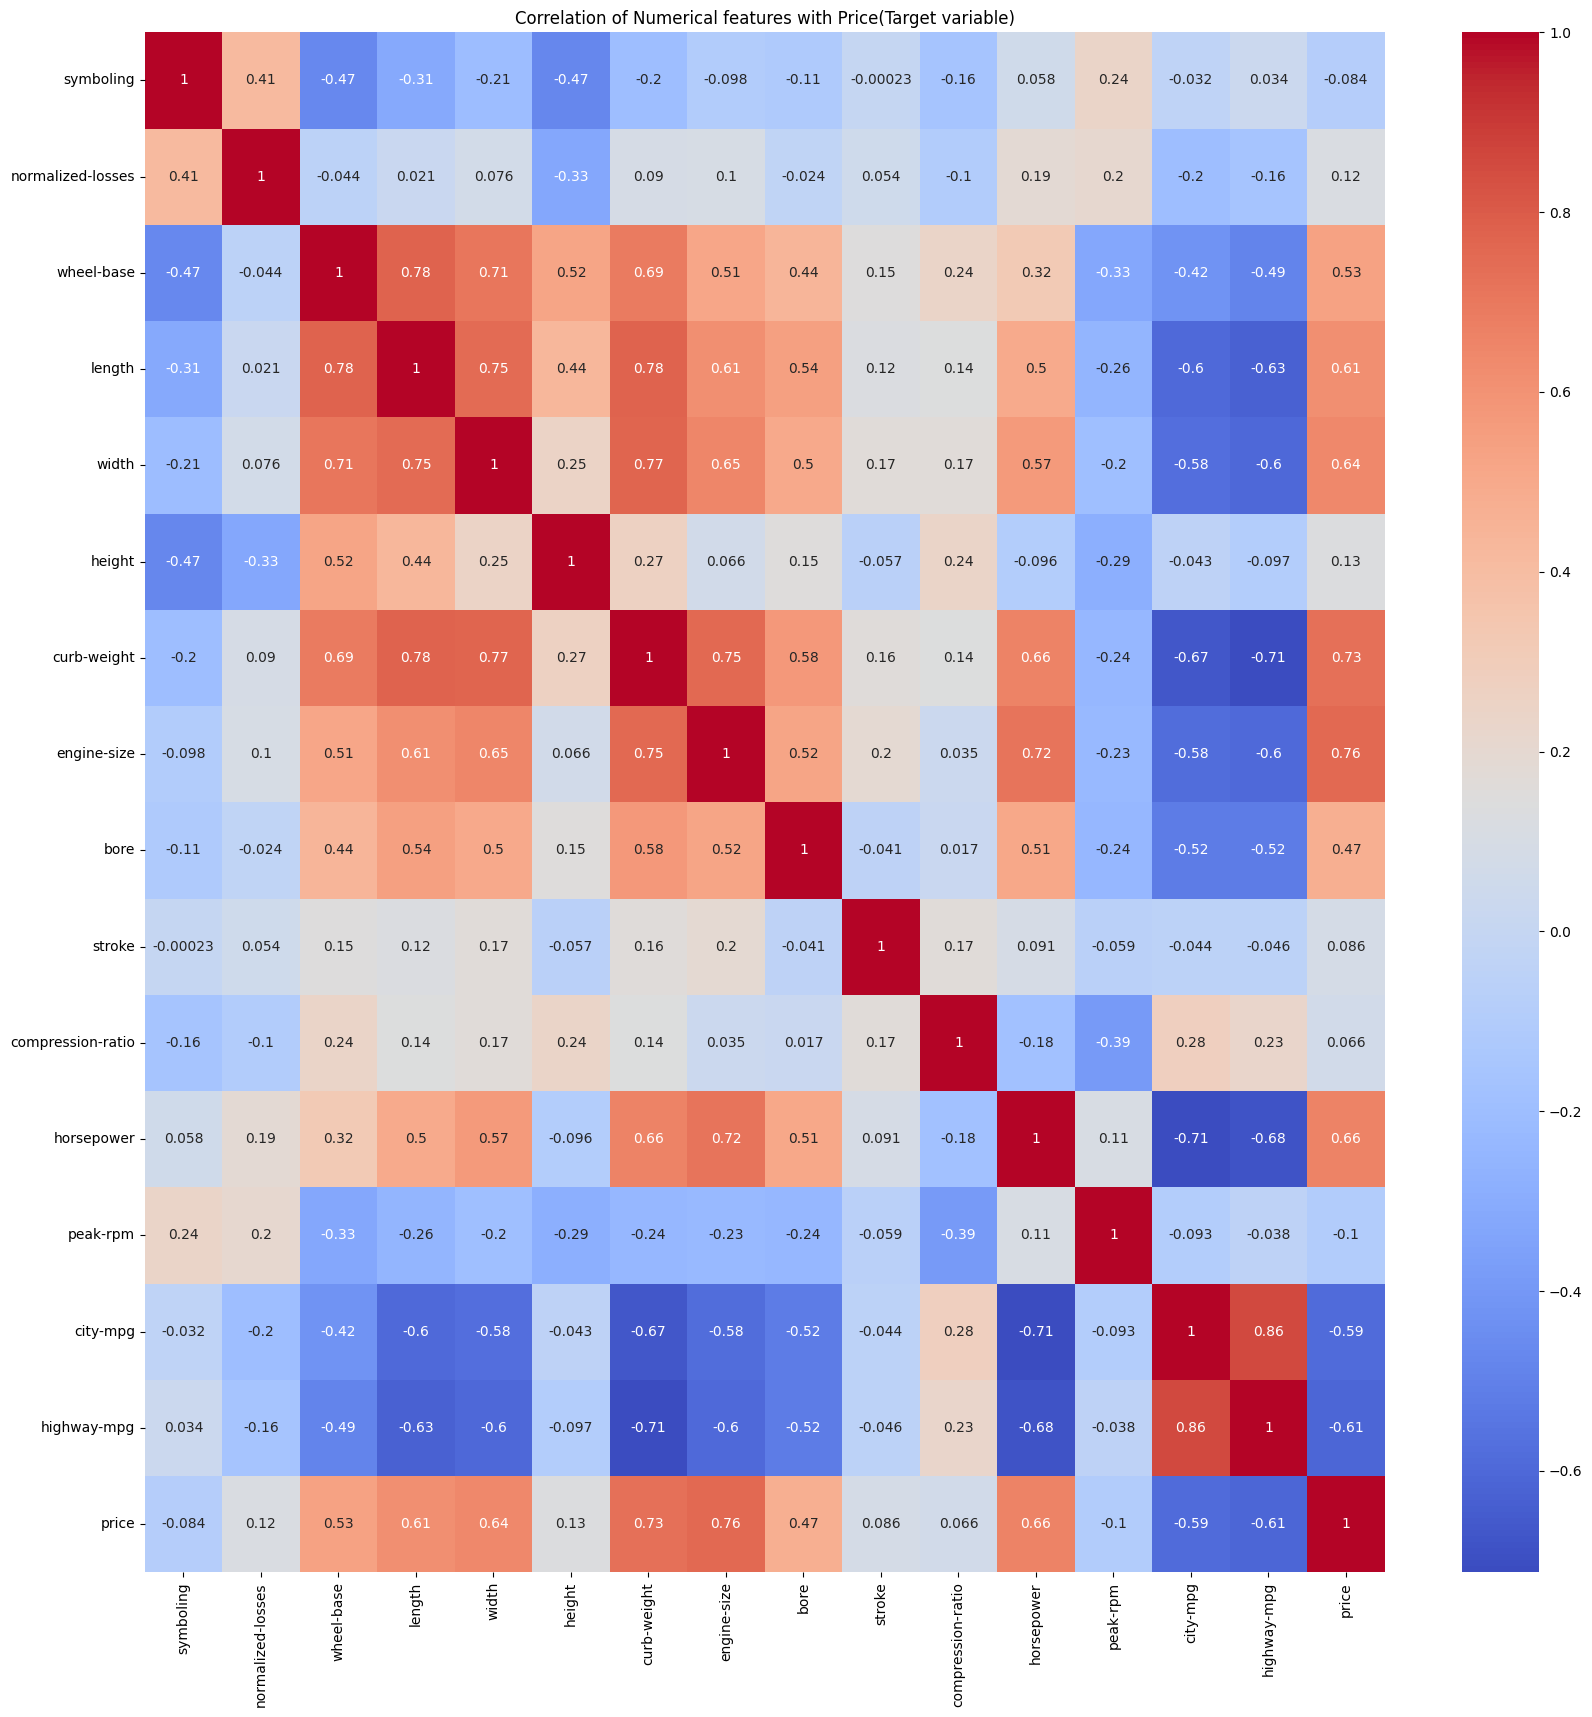

In [47]:
# Correlation of Numerical features with Price(Target variable)
plt.figure(figsize= (20, 20))
sns.heatmap(car_df.corr(numeric_only= True), annot= True, cmap= 'coolwarm')
plt.title('Correlation of Numerical features with Price(Target variable)')
plt.show()

# **Insights:**
Engine size, curb weight, and horsepower have strong positive correlations with price, while highway mpg and city mpg are negatively correlated with price.

#**Task 5 - Separate the features and target variables**

In [48]:
x = car_df.drop(columns= ['price'])
Y = car_df['price']

#**Task 6 - Creating Data Preprocessing Pipelines**

- Scaling the numerical columns
- Encoding the categorical columns
- Visualize the pipeline

In [49]:
numerical_cols = x.select_dtypes(include= ['float64', 'int64']).columns
categorical_cols = x.select_dtypes(include= ['object']).columns

numerical_cols, categorical_cols

(Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
        'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg'],
       dtype='object'),
 Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
        'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
        'fuel-system'],
       dtype='object'))

In [50]:
# Scaling the numerical pipeline
steps_num = [('imputer', SimpleImputer(strategy= 'mean')), ('scaler', StandardScaler())]
numerical_pipeline = Pipeline(steps_num)

# Encoding the categorical pipeline
steps_cat = [('imputer', SimpleImputer(strategy= 'most_frequent')), ('onehotencoder', OneHotEncoder(handle_unknown= 'ignore'))]
categorical_pipeline = Pipeline(steps_cat)

# Creating final pipeline
final_pipeline = ColumnTransformer(transformers = [('num', numerical_pipeline, numerical_cols), ('cat', categorical_pipeline, categorical_cols)])

In [51]:
# Fit and transform the data
training_data_preprocessed = final_pipeline.fit_transform(x)

In [52]:
# Get the columns names after preprocessing
encoded_cat_features = final_pipeline.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(numerical_cols) + list(encoded_cat_features)
training_data_preprocessed_df = pd.DataFrame(training_data_preprocessed, columns= all_features)

# Display the first few rows
training_data_preprocessed_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.840898,-4.763192e-16,-1.794749,-0.460576,-0.897519,0.000000,-0.024863,-7.217629e-16,0.548926,-1.951787e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.840898,-4.763192e-16,-1.794749,-0.460576,-0.897519,-2.151034,-0.024863,6.799721e-02,0.548926,-1.951787e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.134375,-4.763192e-16,-0.757859,-0.254667,-0.207163,-0.581265,0.534597,6.266822e-01,0.000000,7.181050e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.987637,1.394361e+00,0.173584,0.208627,0.138015,0.247224,-0.454121,-4.652930e-01,-0.551232,1.500848e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.987637,1.394361e+00,0.103287,0.000000,0.000000,0.247224,0.536632,2.203658e-01,0.000000,4.815324e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
# Visualize the pipeline
from sklearn import set_config
set_config(display= 'diagram')
final_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object'))])

#**Task 7 - Split the data set into train and test sets**

In [54]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(training_data_preprocessed_df, Y, test_size= 0.20, random_state= 42)

In [55]:
# Checking the shape of dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20699, 75), (5175, 75), (20699,), (5175,))

# **Task 8 - Model Building**

Train model using different Machine Learning Algorithms such as:
- Multiple Linear Regressor
- Decision Tree Regressor
- KNN Regressor
- Random Forest Regressor
- Gradient Boosting Regressor


# **Linear Regression**

In [56]:
# Initialize and train linear model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'MSE: {mse_lr}')
print(f'R2 Score: {r2_lr}')

MSE: 11304454.945602803
R2 Score: 0.7936822530126997


# **KNN Regressor**

In [57]:
from sklearn.model_selection import GridSearchCV

para = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Total 8 combinations of KNNRegressor will be run in Gridsearch

In [58]:
car_price = GridSearchCV(KNeighborsRegressor(), para, cv= 10)

car_price.fit(X_train, y_train)

car_price.best_score_

0.8633282851470796

In [59]:
car_price.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [60]:
# Initialize and train KNN model
KNN_reg = KNeighborsRegressor(n_neighbors = 11, weights = 'uniform')
KNN_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = KNN_reg.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'MSE: {mse_knn}')
print(f'R2 Score: {r2_knn}')

MSE: 7362619.50788476
R2 Score: 0.8656247403257241


# **Decision Tree**

In [61]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'MSE: {mse_dt}')
print(f'R2 Score: {r2_dt}')

MSE: 12764236.730297646
R2 Score: 0.7670397576106112


# **Random Forest**

In [62]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'MSE: {mse_rf}')
print(f'R2 Score: {r2_rf}')

MSE: 8715548.005266055
R2 Score: 0.8409324255915935


# **Gradient Boosting**

In [63]:
# Initialize and train the Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'MSE: {mse_gb}')
print(f'R2 Score: {r2_gb}')

MSE: 8067374.766753655
R2 Score: 0.8527622433820885


# **Task 9 - Evaluate the model's performance using MSE and R2 score. Also compare the different model's performances based on the high accuracy achieved and low Mean Square Error.**

In [65]:
# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lr, mse_knn, mse_dt, mse_rf, mse_gb],
    'R2 Score': [r2_lr, r2_knn, r2_dt, r2_rf, r2_gb]
})

model_comparison

,Model,MSE,R2 Score
0,Linear Regression,1.130445e+07,0.793682
1,KNN Regressor,7.362620e+06,0.865625
2,Decision Tree,1.276424e+07,0.767040
3,Random Forest,8.715548e+06,0.840932
4,Gradient Boosting,8.067375e+06,0.852762


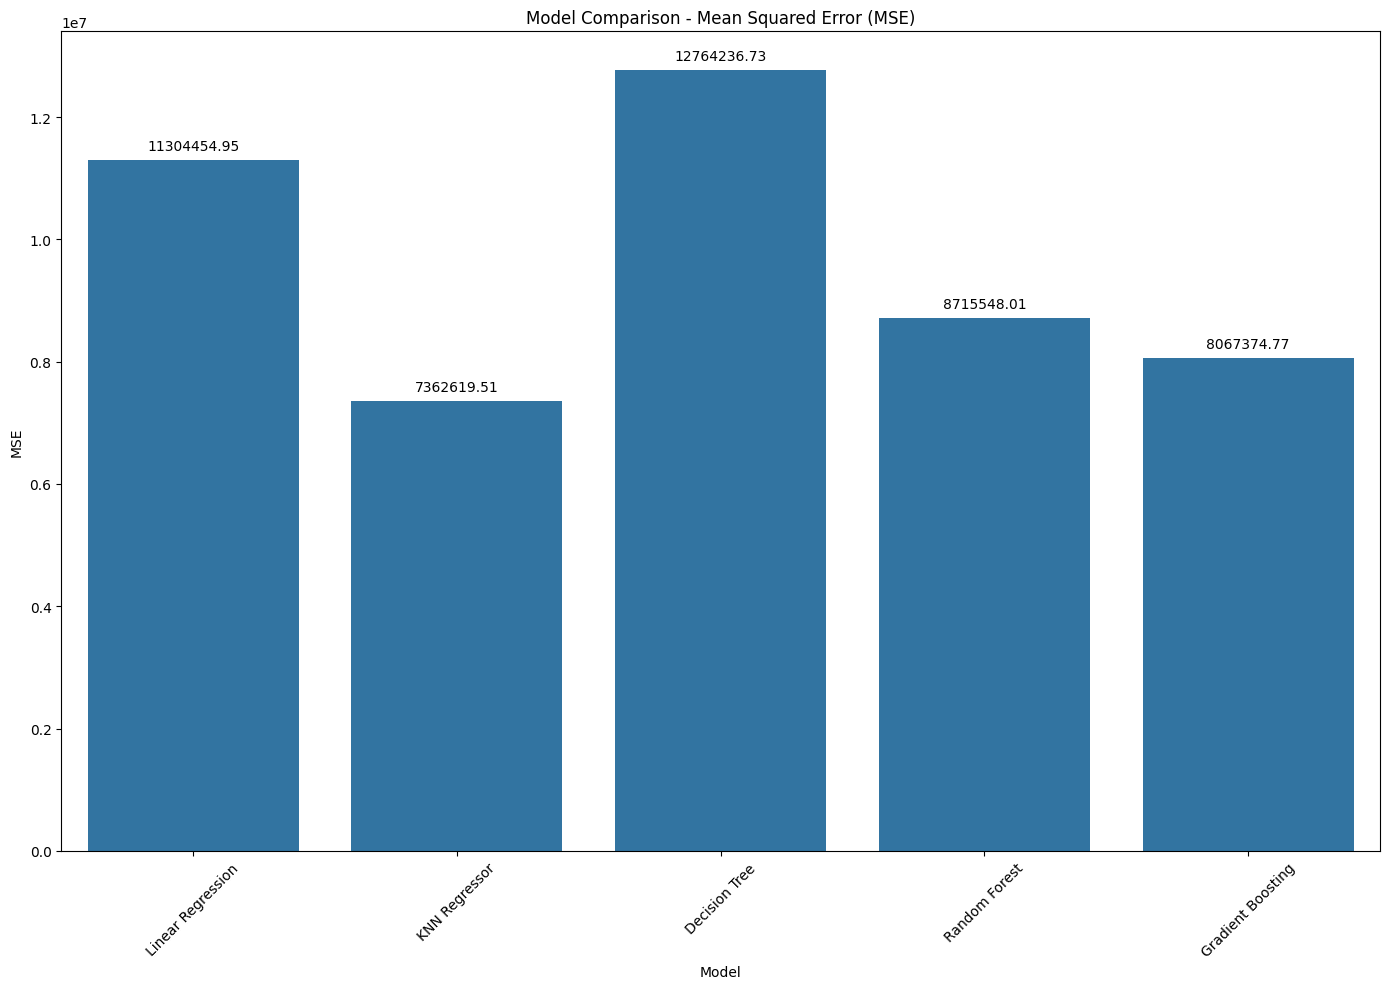

In [68]:
# Plot the comparison of MSE
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Model', y='MSE', data=model_comparison)
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Add text annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display plot
plt.tight_layout()
plt.show()

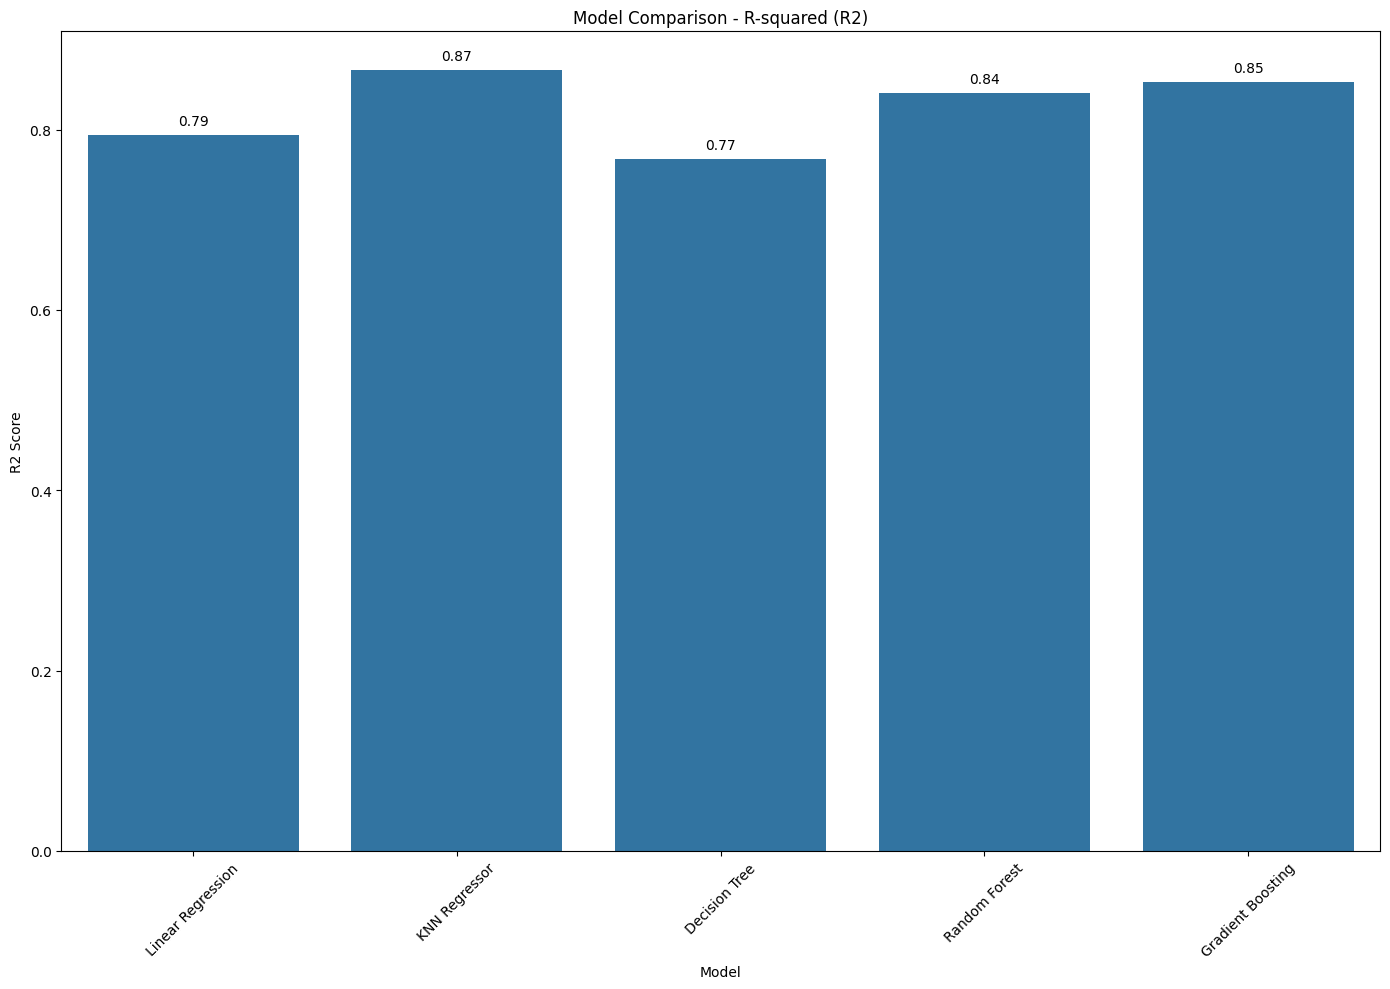

In [70]:
# Plot the comparison of R2
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Model', y='R2 Score', data=model_comparison)
plt.title('Model Comparison - R-squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

# Add text annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display plot
plt.tight_layout()
plt.show()

1. **Mean Squared Error (MSE)**
    - **Lower MSE** indicates better performance.
    - **KNearestNeighbour** has the lowest MSE (736), followed by **Gradient Boosting** (806), **Random Forest** (871).

2. **R-squared (R2)**
    - **Higher R2** indicates better performance.
    - **KNearestNeighbour** has the highest R2 (0.87), followed by **Gradient Boosting** (0.85), **Random Forest** (0.84), and **Linear Regression** (0.79).

So,
- **KNearestNeighbour** performs the best in terms of both MSE and R2. It has the lowest MSE and the highest R2, indicating that it is the most accurate and explains the most variance in the data.
- **Gradient Boosting** is the second-best model, with a relatively low MSE and a high R2.
- **Decision Tree** and **Linear Regression** have higher MSE and lower R2 values, indicating that they are less accurate and explain less variance in the data compared to the other models.